In [4]:
import numpy as np 
import pandas as pd 
# from pandas_datareader.data import DataReader
from datetime import datetime

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)

In [6]:
df = pd.read_csv('/content/GOOGL_data.csv')
print(df.shape)
df.head()

(1259, 7)


,date,open,high,low,close,volume,Name
0,2013-02-08,390.4551,393.7283,390.1698,393.0777,6031199,GOOGL
1,2013-02-11,389.5892,391.8915,387.2619,391.6012,4330781,GOOGL
2,2013-02-12,391.2659,394.3440,390.0747,390.7403,3714176,GOOGL
3,2013-02-13,390.4551,393.0677,390.3750,391.8214,2393946,GOOGL
4,2013-02-14,390.2549,394.7644,389.2739,394.3039,3466971,GOOGL


**Adding a new Year column**

In [7]:
df['year'] = pd.DatetimeIndex(df['date']).year


**Visualizing Yearly Based Open, Close, High and Low Stocks MAX**

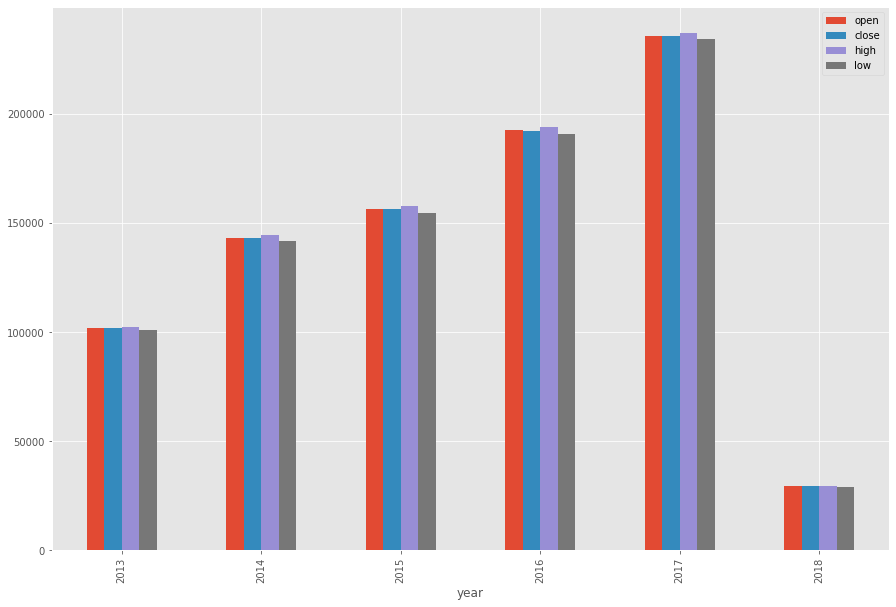

In [8]:
tempdf = df.groupby('year',as_index=False).sum()
tempdf.plot('year',['open','close','high','low'],kind = 'bar')

**Visualizing the amount of stocks sold over year**

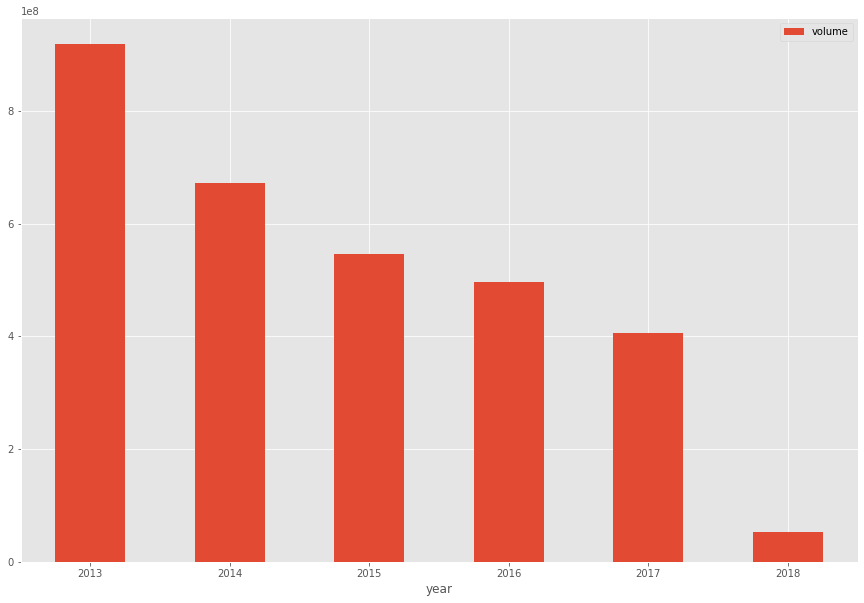

In [9]:
x = df.groupby('year').sum().sort_values('volume', ascending = False)
x.plot.bar( y='volume', rot=0)

**Visualizing the amount of data each year**

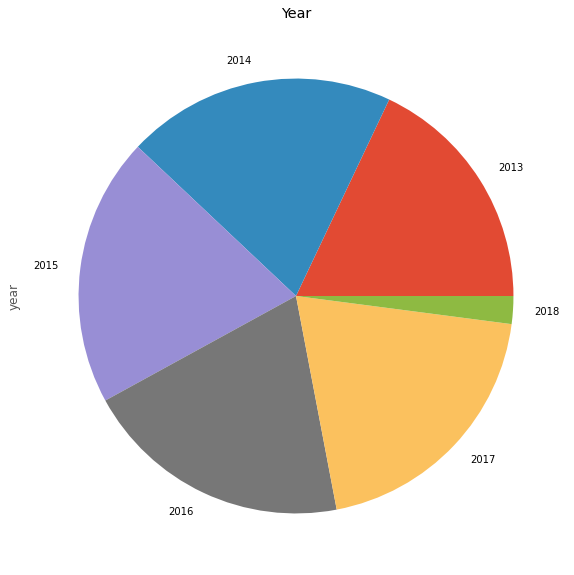

In [10]:
df.groupby('year')['year'].agg('count').plot(kind='pie',title='Year')
plt.show()

In [11]:
newDf = df[(df.year==2013)]
newDf.volume.sum()
s = df.year.value_counts()
x = s.to_dict()
x

{2013: 226, 2014: 252, 2015: 252, 2016: 252, 2017: 251, 2018: 26}

In [12]:
def yearlyAllocatedData(years_dict,totalSize):
    allocation = []
    for i in years_dict:
        allocation.append((100 * years_dict[i] / totalSize))
    return allocation

In [13]:
print(yearlyAllocatedData(x,len(df)))

[20.015885623510723, 20.015885623510723, 20.015885623510723, 19.936457505957108, 17.95075456711676, 2.0651310563939633]


**Filtering 2018 data since, there is very less number of data we have for that year**

In [14]:
df = df[df['year'] != 2018]
df

,date,open,high,low,close,volume,Name,year
0,2013-02-08,390.4551,393.7283,390.1698,393.0777,6031199,GOOGL,2013
1,2013-02-11,389.5892,391.8915,387.2619,391.6012,4330781,GOOGL,2013
2,2013-02-12,391.2659,394.3440,390.0747,390.7403,3714176,GOOGL,2013
3,2013-02-13,390.4551,393.0677,390.3750,391.8214,2393946,GOOGL,2013
4,2013-02-14,390.2549,394.7644,389.2739,394.3039,3466971,GOOGL,2013
...,...,...,...,...,...,...,...,...
1228,2017-12-22,1070.0000,1071.7200,1067.6400,1068.8600,889446,GOOGL,2017
1229,2017-12-26,1068.6400,1068.8600,1058.6400,1065.8500,918767,GOOGL,2017
1230,2017-12-27,1066.6000,1068.2700,1058.3800,1060.2000,1116203,GOOGL,2017
1231,2017-12-28,1062.2500,1064.8400,1053.3800,1055.9500,994249,GOOGL,2017


**Grapical Visualization of  Open, Close, High and Low Stocks over Days**

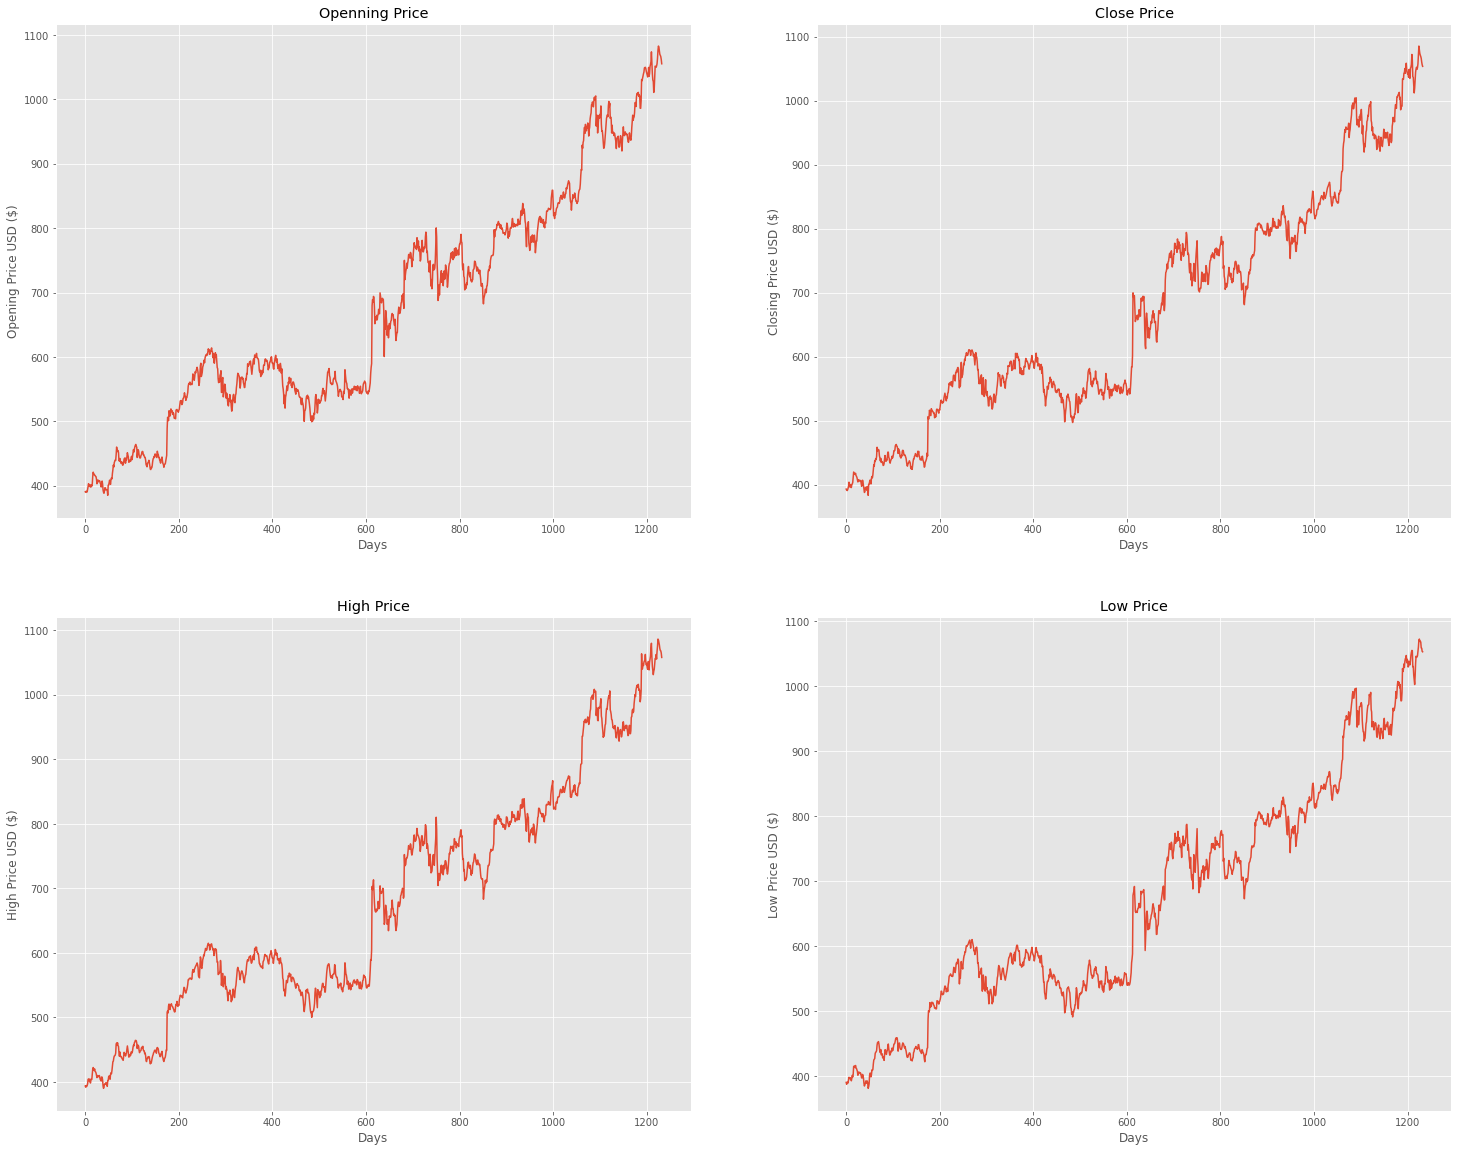

In [15]:
fig = plt.figure(figsize=(25,20))

# Visualizing the opening prices of the data.
plt.subplot(2,2,1)
plt.title('Openning Price')
plt.xlabel('Days')
plt.ylabel('Opening Price USD ($)')
plt.plot(df['open'])

# Visualizing the closing prices of the data.
plt.subplot(2,2,2)
plt.title('Close Price')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(df['close'])

# Visualizing the high prices of the data.
plt.subplot(2,2,3)
plt.title('High Price')
plt.xlabel('Days')
plt.ylabel('High Price USD ($)')
plt.plot(df['high'])

# Visualizing the low prices of the data.
plt.subplot(2,2,4)
plt.title('Low Price')
plt.xlabel('Days')
plt.ylabel('Low Price USD ($)')
plt.plot(df['low'])

plt.show()

**Grapical Visualization of Date Over Open, Close, High and Low Stocks**

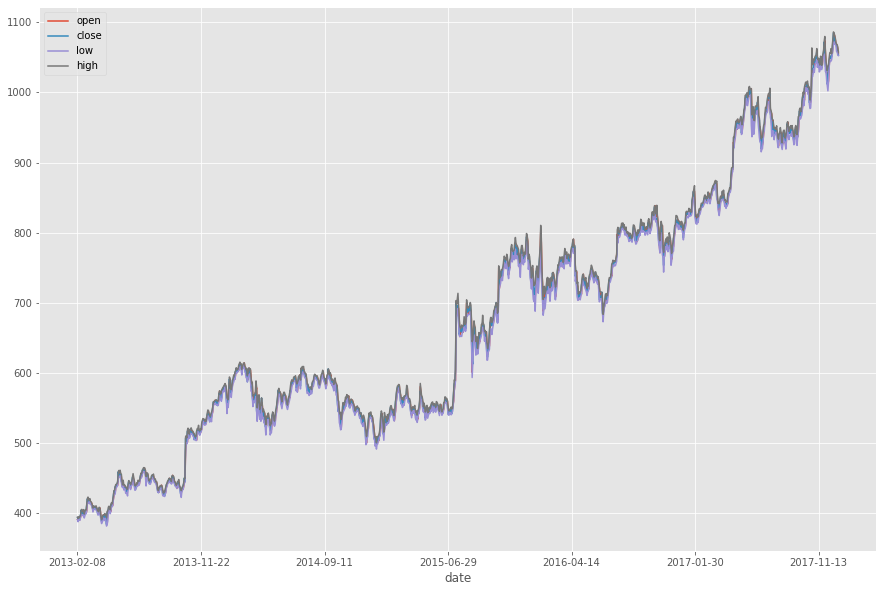

In [16]:
df.plot(kind = "line",x = 'date' , y = ['open', 'close', 'low','high'])

**Grapical Visualization of Date Over Open, Close, High and Low Stocks (*Clear Insights*)**

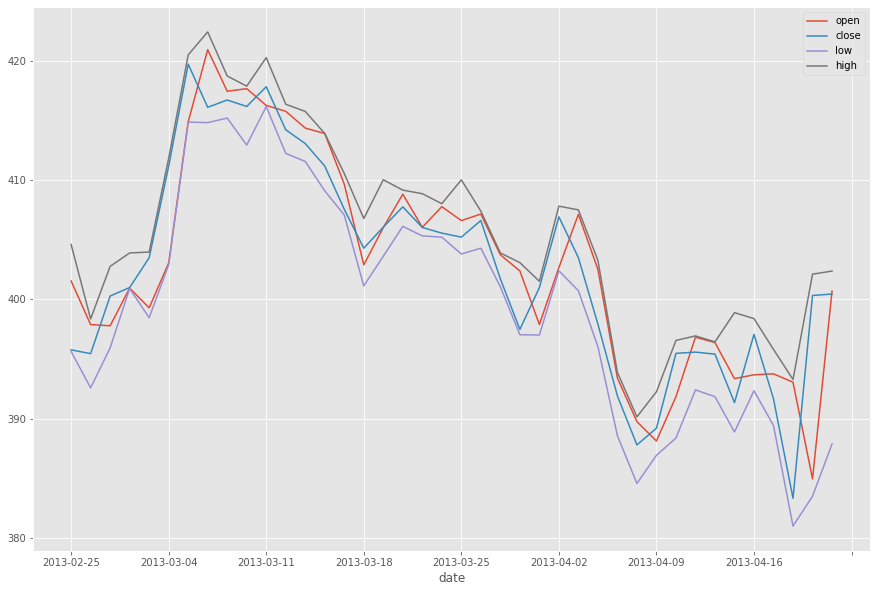

In [17]:
df[10:50].plot(kind = "line",x = 'date' , y = ['open', 'close', 'low','high'])

**Grapical Visualization of Yearly Based Open, Close, High and Low Stocks Over Month**

In [18]:
df['months'] = pd.DatetimeIndex(df['date']).month
df.head()

,date,open,high,low,close,volume,Name,year,months
0,2013-02-08,390.4551,393.7283,390.1698,393.0777,6031199,GOOGL,2013,2
1,2013-02-11,389.5892,391.8915,387.2619,391.6012,4330781,GOOGL,2013,2
2,2013-02-12,391.2659,394.3440,390.0747,390.7403,3714176,GOOGL,2013,2
3,2013-02-13,390.4551,393.0677,390.3750,391.8214,2393946,GOOGL,2013,2
4,2013-02-14,390.2549,394.7644,389.2739,394.3039,3466971,GOOGL,2013,2


In [19]:
yearly_open_Pivot = pd.pivot_table(df, values = "open", columns = "year", index = "months")
yearly_close_Pivot = pd.pivot_table(df, values = "close", columns = "year", index = "months")
yearly_high_Pivot = pd.pivot_table(df, values = "high", columns = "year", index = "months")
yearly_low_Pivot = pd.pivot_table(df, values = "low", columns = "year", index = "months")

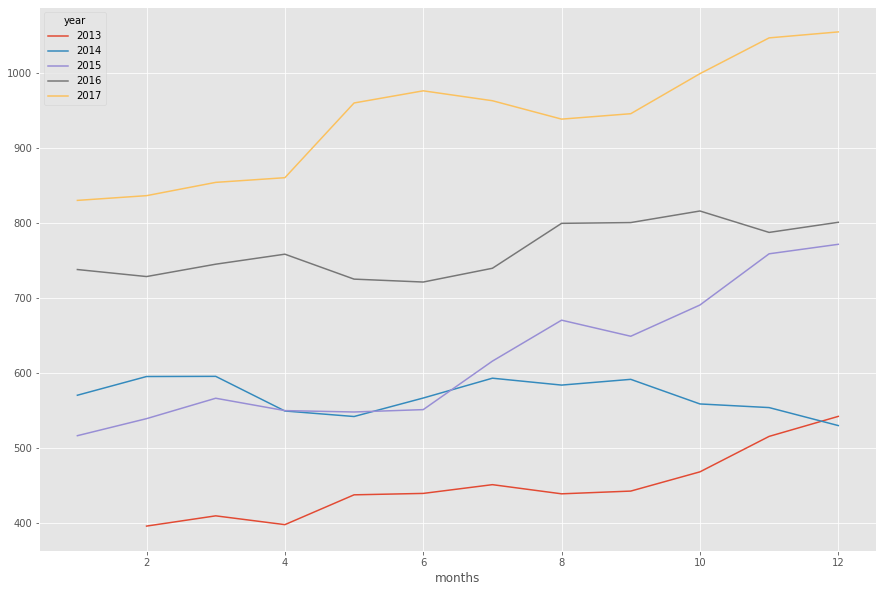

In [20]:
yearly_open_Pivot.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff1344c76d0>,
      dtype=object)

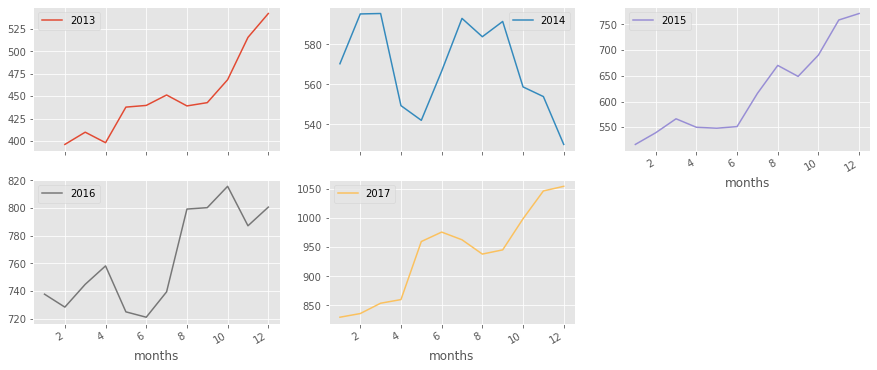

In [21]:
yearly_open_Pivot.plot(subplots = True, figsize=(15, 10), layout=(3,3))

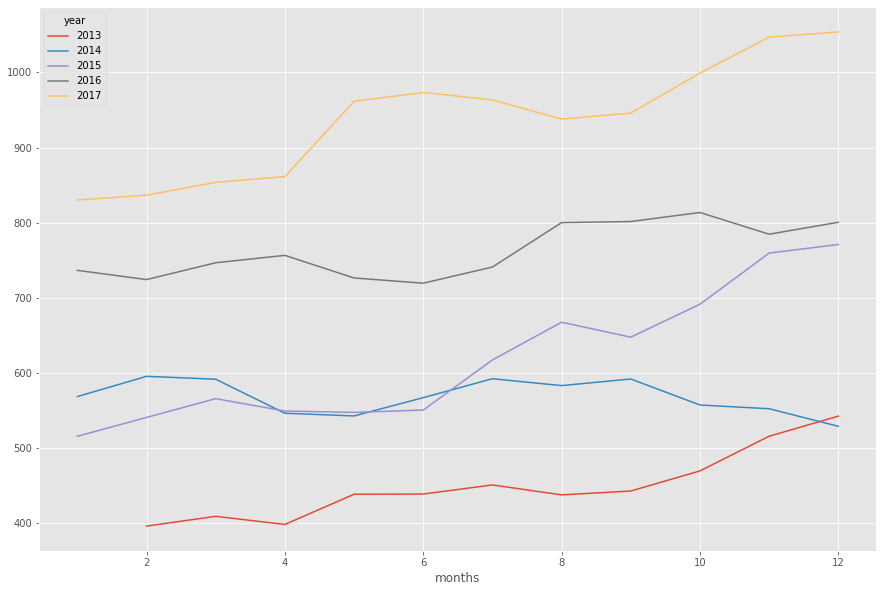

In [22]:
yearly_close_Pivot.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff13418e5d0>,
      dtype=object)

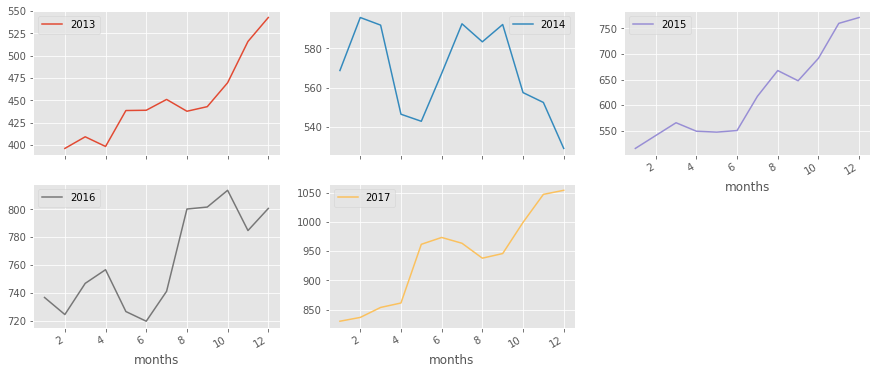

In [23]:
yearly_close_Pivot.plot(subplots = True, figsize=(15, 10), layout=(3,3))

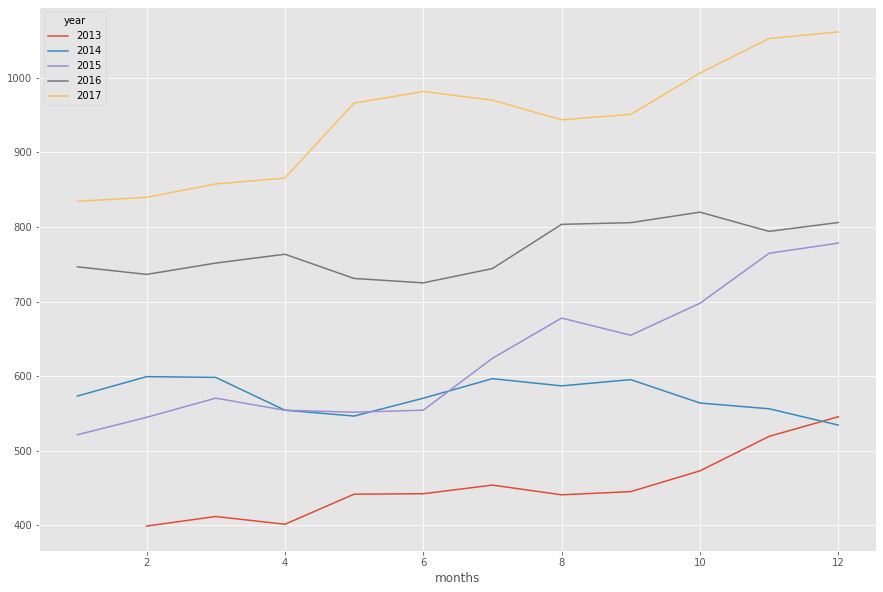

In [24]:
yearly_high_Pivot.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff133d606d0>,
      dtype=object)

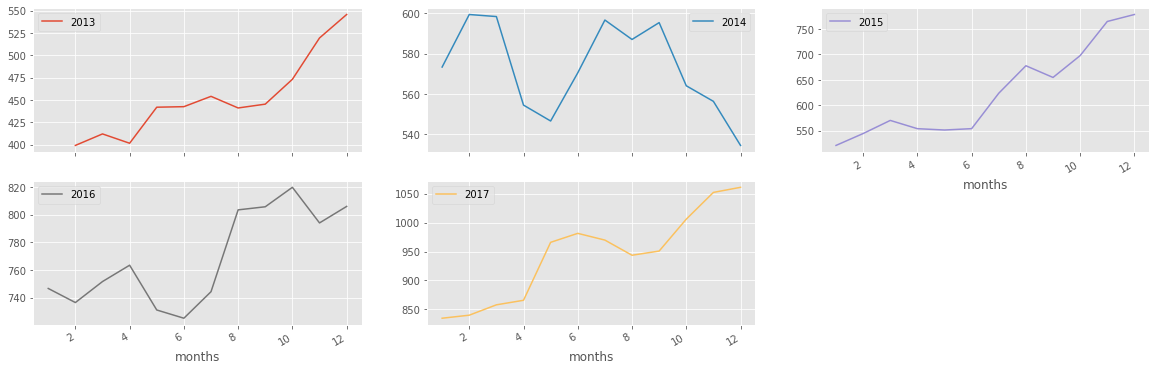

In [25]:
yearly_high_Pivot.plot(subplots = True, figsize=(20, 10), layout=(3,3))

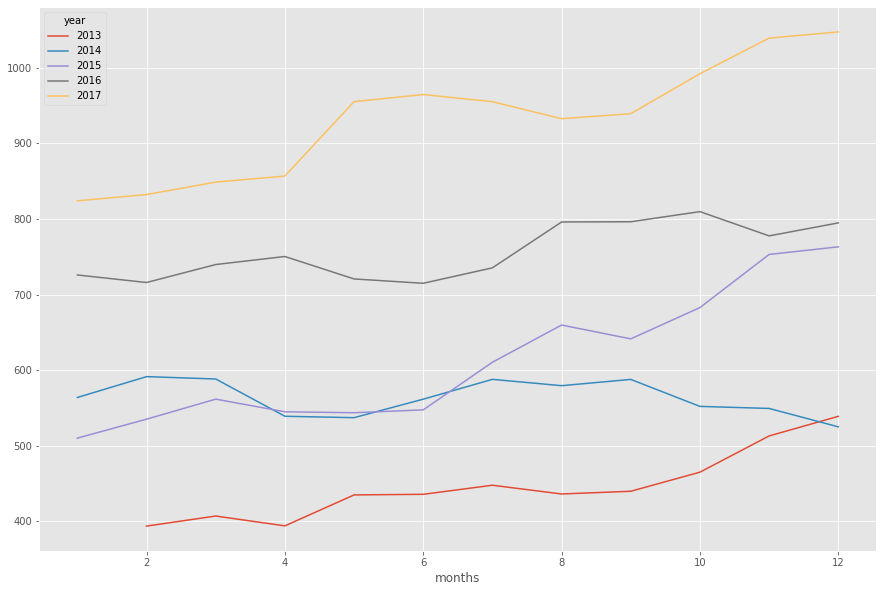

In [26]:
yearly_low_Pivot.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff133a0b710>,
      dtype=object)

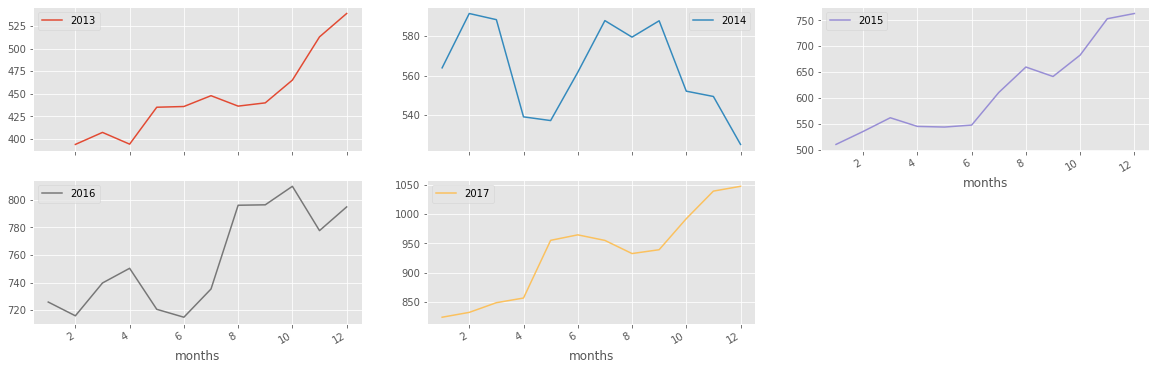

In [27]:
yearly_low_Pivot.plot(subplots = True, figsize=(20, 10), layout=(3,3))

# Predicting the Closing Price Stock of Google GOOGL

In [28]:
df.head()

,date,open,high,low,close,volume,Name,year,months
0,2013-02-08,390.4551,393.7283,390.1698,393.0777,6031199,GOOGL,2013,2
1,2013-02-11,389.5892,391.8915,387.2619,391.6012,4330781,GOOGL,2013,2
2,2013-02-12,391.2659,394.3440,390.0747,390.7403,3714176,GOOGL,2013,2
3,2013-02-13,390.4551,393.0677,390.3750,391.8214,2393946,GOOGL,2013,2
4,2013-02-14,390.2549,394.7644,389.2739,394.3039,3466971,GOOGL,2013,2


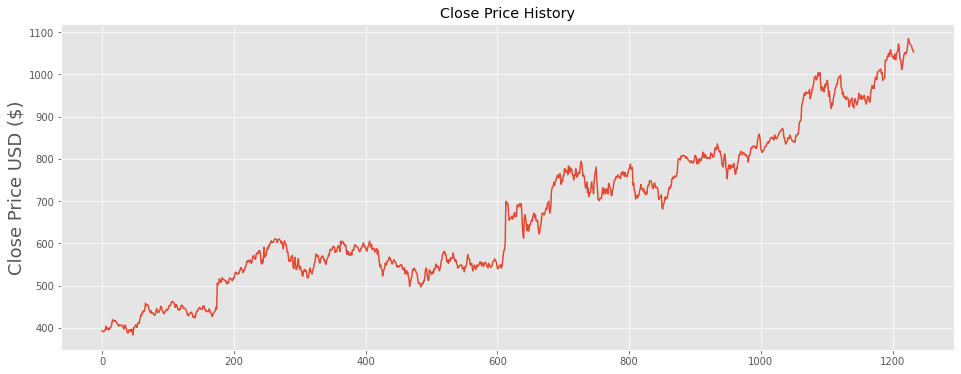

In [29]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['close'])
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [30]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1172

In [31]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01387631],
       [0.01177228],
       [0.01054549],
       ...,
       [0.96453153],
       [0.95847524],
       [0.95484147]])

In [32]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.01387631, 0.01177228, 0.01054549, 0.01208607, 0.01562366,
       0.01923962, 0.02919615, 0.01893295, 0.02112262, 0.02410388,
       0.01772768, 0.01727125, 0.02415376, 0.02516651, 0.02872547,
       0.03964774, 0.05184368, 0.04669141, 0.04755867, 0.04679131,
       0.04914485, 0.04400257, 0.04236224, 0.03967339, 0.03451115,
       0.02986662, 0.03238432, 0.03480071, 0.03234143, 0.03166398,
       0.03118603, 0.03316879, 0.02620777, 0.02016544, 0.02515939,
       0.03361097, 0.02873402, 0.02079444, 0.01222159, 0.00637321,
       0.00837022, 0.01730688, 0.01745664, 0.01721411, 0.01142287,
       0.01958204, 0.01187218, 0.        , 0.02421788, 0.02439202,
       0.02994499, 0.03390623, 0.03080086, 0.02532341, 0.03790452,
       0.04183441, 0.03888165, 0.045429  , 0.05691899, 0.06820919])]
[0.06512803705023162]

[array([0.01387631, 0.01177228, 0.01054549, 0.01208607, 0.01562366,
       0.01923962, 0.02919615, 0.01893295, 0.02112262, 0.02410388,
       0.01772768, 0.01727125, 0.02

In [33]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, batch_size=8, epochs=100)

Epoch 1/100
139/139 [==============================] - 9s 47ms/step - loss: 0.0060
Epoch 2/100
139/139 [==============================] - 7s 47ms/step - loss: 7.6471e-04
Epoch 3/100
139/139 [==============================] - 7s 47ms/step - loss: 8.4603e-04
Epoch 4/100
139/139 [==============================] - 7s 48ms/step - loss: 7.0346e-04
Epoch 5/100
139/139 [==============================] - 7s 47ms/step - loss: 6.6242e-04
Epoch 6/100
139/139 [==============================] - 7s 48ms/step - loss: 6.2584e-04
Epoch 7/100
139/139 [==============================] - 7s 48ms/step - loss: 5.7039e-04
Epoch 8/100
139/139 [==============================] - 7s 48ms/step - loss: 5.5823e-04
Epoch 9/100
139/139 [==============================] - 6s 46ms/step - loss: 5.2280e-04
Epoch 10/100
139/139 [==============================] - 6s 46ms/step - loss: 5.1014e-04
Epoch 11/100
139/139 [==============================] - 7s 49ms/step - loss: 5.4354e-04
Epoch 12/100
139/139 [=======================

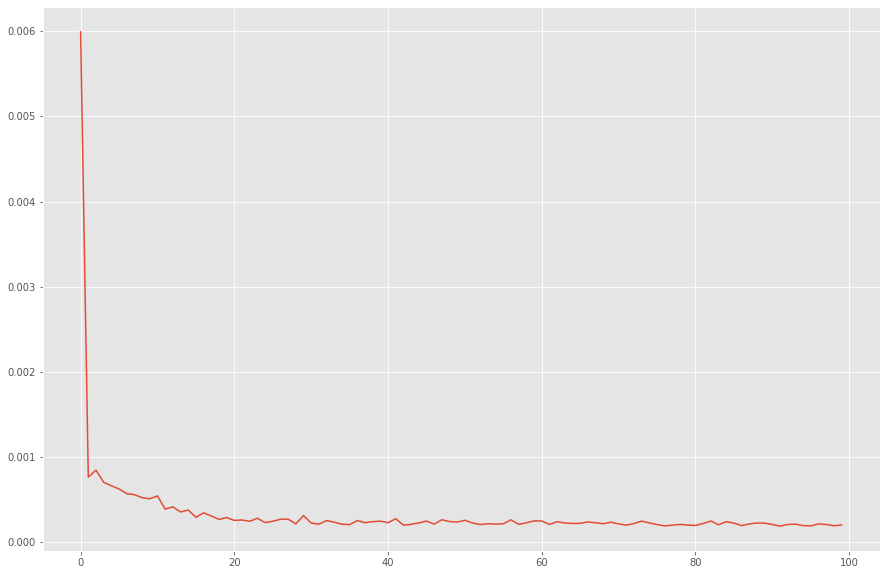

In [34]:
plt.plot(history.history['loss'])

In [35]:

test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)


x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))


predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

21.468849695556724

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


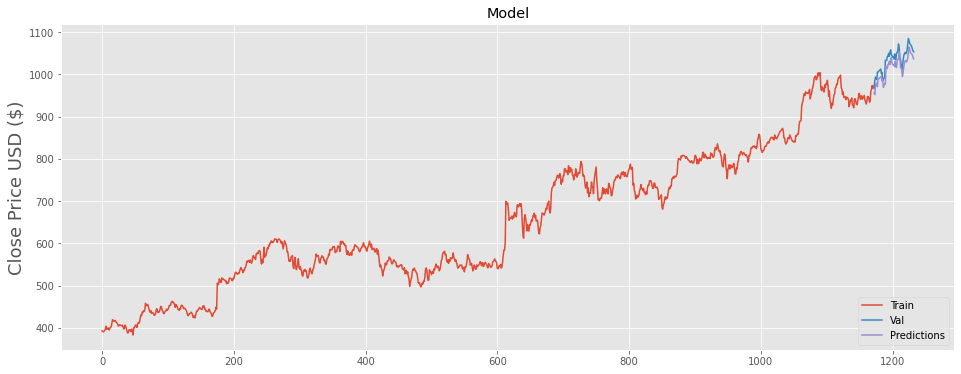

In [36]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [37]:
# Show the valid and predicted prices
valid

,close,Predictions
1172,966.78,957.123718
1173,985.19,952.038818
1174,993.64,971.127075
1175,992.31,979.204529
1176,987.80,976.217834
...,...,...
1228,1068.86,1049.591431
1229,1065.85,1048.417358
1230,1060.20,1045.778564
1231,1055.95,1040.406006
